In [4]:
##########################################################複製區塊
# import numpy as np
import matplotlib.pyplot as plt
import time
from scipy import signal
from time import sleep
import sys
import meep as mp
import numpy as np

#setup some constants and parameters
M=2**21
tsim=7e-12
eps0 = 8.854187e-12
hbar = 1.05457182e-34
c = 2.99792458e8
kb = 1.380649e-23
hdk=7.63823258e-12
deltap = np.sqrt(1/3/eps0/hbar/c)*kb
T=30000
frq_min = 0
frq_max = 1.25*25/(6*np.pi)
nfreq = 1000
fcen = (frq_min + frq_max)/2
df = frq_max - frq_min
dfp = 1/2
#define square root of Dn function
def Dnsqt(wla,T):
    return np.sqrt(6*hdk**2*wla/(np.exp(hdk*wla/T)-1)/T**2/np.pi)

#generate an array of the square root of Dn function
Dsqt = []
for n in range(1,M):
    Dsqt.append(Dnsqt(2*np.pi*n/tsim,T))

#define how many times to run to average the results
Ncomp=100
nfreq =  1000
#define the starting sum of the result
Efsum = np.zeros(nfreq)
Ens = np.zeros(2*22)
resolution = 10
sz = 16  
cell = mp.Vector3(0, 0, sz)
dpml = 1.0
pml_layers = [mp.PML(dpml)]
nq = 0


for i in range(Ncomp):
    
    #generate random numbers
    M0 = np.random.normal(0,1)
    Mlp = np.random.normal(0,1,M-1)
    Nlp = np.random.normal(0,1,M-1)
    MM = np.random.normal(0,1)
    
    #generate the array of the fourier transform of E field, we generate l=0 and l=-M separately. 
    #for l=1 to M-1 and l=-1 to -(M-1) are conjutated to each other. 
    #we contruct the whole array by gluing them together by the order from l=0 -> l=M-1 -> l=-M -> l=-(m-1) -> l=-1
    Ef0 = np.array([M0*np.sqrt(6*hdk/np.pi/T)])
    Eflp = np.multiply((Mlp + 1j*Nlp), Dsqt)
    Eflm = np.flip(np.conjugate(Eflp))
    EfM = np.array([MM*Dnsqt(2*np.pi*M/tsim,T)])
    Ef = np.hstack((Ef0,Eflp,EfM,Eflm))
    
    #we normalize Ef and compute its inverse fast fourier transform
    Efn = deltap*T/np.sqrt(tsim)*Ef
    En = np.fft.ifft(Efn)
    
    
    #generate some feedback to check the progress of the loop
    x = i/Ncomp*100
    sys.stdout.write('\r')
    sys.stdout.write("[%-20s] %d%%" % ('m'*int(x), int(x)))
    sys.stdout.flush()
    sleep(0.0001)
    def source(t):
        f = int(t*200)
        #print(t)
        #print(f)
        return En[f]

    sources = [mp.Source(mp.CustomSource(src_func=source),
                     component=mp.Ex,
                     center=mp.Vector3(0,0,-0.5*sz+dpml),
                     #amplitude=2e-9
                     )]
    
    sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    sources=sources,
                    dimensions = 1,
                    Courant = 1,
                    resolution=resolution)
    

    # transmitted flux
    tran_fr = mp.FluxRegion(center=mp.Vector3(0,0,-0.5*sz+dpml+0.5))#, size=mp.Vector3(0,2,0))
    tran = sim.add_flux(fcen, df*dfp, nfreq, tran_fr)
    
    
    sim.run(until=2100)

    tran_flux = mp.get_fluxes(tran)
    flux_freqs = mp.get_flux_freqs(tran)
    Ts = []
    fs = []
    for i in range(nfreq):
        fs = np.append(fs,flux_freqs[i])
        Ts = np.append(Ts,tran_flux[i])    
    Efsum += Ts
    
    
    

#average the final result
Efavg = Efsum*tsim/Ncomp

#save data to some file or reload file to write more data on it
######################################################複製區塊


[                    ] 0%-----------
Initializing structure...
time for choose_chunkdivision = 2.7895e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.69685e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[m                   ] 1%-----------
Initializing structure...
time for choose_chunkdivision = 2.47955e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 5.00679e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mm                  ] 2%-----------
Initializing structure...
time for choose_chunkdivision = 2.28882e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.3869e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmm                 ] 3%-----------
Initializing structure...
time for choose_chunkdivision = 2.5034e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.69685e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmm                ] 4%-----------
Initializing structure...
time for choose_chunkdivision = 2.59876e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.69685e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmm               ] 5%-----------
Initializing structure...
time for choose_chunkdivision = 2.59876e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.41074e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmm              ] 6%-----------
Initializing structure...
time for choose_chunkdivision = 2.5034e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.88758e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmm             ] 7%-----------
Initializing structure...
time for choose_chunkdivision = 2.59876e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 5.00679e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmm            ] 8%-----------
Initializing structure...
time for choose_chunkdivision = 2.5034e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 5.50747e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmm           ] 9%-----------
Initializing structure...
time for choose_chunkdivision = 2.38419e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.81606e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmm          ] 10%-----------
Initializing structure...
time for choose_chunkdivision = 2.59876e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.72069e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmm         ] 11%-----------
Initializing structure...
time for choose_chunkdivision = 2.5034e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.50611e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmm        ] 12%-----------
Initializing structure...
time for choose_chunkdivision = 2.59876e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.81606e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmm       ] 13%-----------
Initializing structure...
time for choose_chunkdivision = 2.6226e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.3869e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmm      ] 14%-----------
Initializing structure...
time for choose_chunkdivision = 2.31266e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.48227e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmm     ] 15%-----------
Initializing structure...
time for choose_chunkdivision = 2.28882e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 7.82013e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmm    ] 16%-----------
Initializing structure...
time for choose_chunkdivision = 6.41346e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 5.00679e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmm   ] 17%-----------
Initializing structure...
time for choose_chunkdivision = 2.38419e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 7.00951e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmm  ] 18%-----------
Initializing structure...
time for choose_chunkdivision = 2.28882e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.60148e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmm ] 19%-----------
Initializing structure...
time for choose_chunkdivision = 2.71797e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.69685e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmm] 20%-----------
Initializing structure...
time for choose_chunkdivision = 2.5034e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.3869e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmm] 21%-----------
Initializing structure...
time for choose_chunkdivision = 2.90871e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 6.00815e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmm] 22%-----------
Initializing structure...
time for choose_chunkdivision = 2.81334e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.81606e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmm] 23%-----------
Initializing structure...
time for choose_chunkdivision = 2.69413e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.69685e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmm] 24%-----------
Initializing structure...
time for choose_chunkdivision = 2.38419e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.60148e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmm] 25%-----------
Initializing structure...
time for choose_chunkdivision = 2.28882e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.41074e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmm] 26%-----------
Initializing structure...
time for choose_chunkdivision = 2.31266e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 5.4121e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmm] 27%-----------
Initializing structure...
time for choose_chunkdivision = 2.5034e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.72069e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmm] 28%-----------
Initializing structure...
time for choose_chunkdivision = 2.59876e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.50611e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmm] 28%-----------
Initializing structure...
time for choose_chunkdivision = 2.69413e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 0.000108004 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 30%-----------
Initializing structure...
time for choose_chunkdivision = 2.71797e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.50611e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 31%-----------
Initializing structure...
time for choose_chunkdivision = 4.79221e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 5.10216e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 32%-----------
Initializing structure...
time for choose_chunkdivision = 2.59876e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.41074e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 33%-----------
Initializing structure...
time for choose_chunkdivision = 2.31266e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 5.29289e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 34%-----------
Initializing structure...
time for choose_chunkdivision = 2.69413e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.69685e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 35%-----------
Initializing structure...
time for choose_chunkdivision = 2.69413e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.50611e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 36%-----------
Initializing structure...
time for choose_chunkdivision = 3.00407e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 8.4877e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 37%-----------
Initializing structure...
time for choose_chunkdivision = 2.5034e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.69685e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 38%-----------
Initializing structure...
time for choose_chunkdivision = 2.28882e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.60148e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 39%-----------
Initializing structure...
time for choose_chunkdivision = 2.69413e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.69685e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 40%-----------
Initializing structure...
time for choose_chunkdivision = 2.7895e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.79221e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 41%-----------
Initializing structure...
time for choose_chunkdivision = 2.59876e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.69685e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 42%-----------
Initializing structure...
time for choose_chunkdivision = 5.00679e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.60148e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 43%-----------
Initializing structure...
time for choose_chunkdivision = 2.69413e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 5.6982e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 44%-----------
Initializing structure...
time for choose_chunkdivision = 2.38419e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.29153e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 45%-----------
Initializing structure...
time for choose_chunkdivision = 2.5034e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.72069e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 46%-----------
Initializing structure...
time for choose_chunkdivision = 2.6226e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.60148e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 47%-----------
Initializing structure...
time for choose_chunkdivision = 2.6226e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 6.69956e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 48%-----------
Initializing structure...
time for choose_chunkdivision = 2.59876e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.50611e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 49%-----------
Initializing structure...
time for choose_chunkdivision = 2.59876e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.48227e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 50%-----------
Initializing structure...
time for choose_chunkdivision = 2.5034e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.60148e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 51%-----------
Initializing structure...
time for choose_chunkdivision = 2.69413e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.31538e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 52%-----------
Initializing structure...
time for choose_chunkdivision = 2.59876e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.60148e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 53%-----------
Initializing structure...
time for choose_chunkdivision = 2.59876e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.29153e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 54%-----------
Initializing structure...
time for choose_chunkdivision = 2.5034e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.50611e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 55%-----------
Initializing structure...
time for choose_chunkdivision = 2.5034e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.50611e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 56%-----------
Initializing structure...
time for choose_chunkdivision = 2.69413e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.50611e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 56%-----------
Initializing structure...
time for choose_chunkdivision = 4.1008e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.50611e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 57%-----------
Initializing structure...
time for choose_chunkdivision = 2.90871e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 5.00679e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 59%-----------
Initializing structure...
time for choose_chunkdivision = 2.59876e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.81606e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 60%-----------
Initializing structure...
time for choose_chunkdivision = 5.10216e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.81606e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 61%-----------
Initializing structure...
time for choose_chunkdivision = 2.59876e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 5.79357e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 62%-----------
Initializing structure...
time for choose_chunkdivision = 2.7895e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 5.10216e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 63%-----------
Initializing structure...
time for choose_chunkdivision = 2.59876e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.60148e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 64%-----------
Initializing structure...
time for choose_chunkdivision = 2.5034e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.41074e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 65%-----------
Initializing structure...
time for choose_chunkdivision = 2.90871e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.81606e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 66%-----------
Initializing structure...
time for choose_chunkdivision = 2.5034e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.31538e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 67%-----------
Initializing structure...
time for choose_chunkdivision = 2.59876e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.48227e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 68%-----------
Initializing structure...
time for choose_chunkdivision = 2.69413e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.88758e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 69%-----------
Initializing structure...
time for choose_chunkdivision = 2.59876e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.50611e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 70%-----------
Initializing structure...
time for choose_chunkdivision = 2.69413e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.81606e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 71%-----------
Initializing structure...
time for choose_chunkdivision = 2.5034e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.88758e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 72%-----------
Initializing structure...
time for choose_chunkdivision = 2.40803e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.50611e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 73%-----------
Initializing structure...
time for choose_chunkdivision = 2.59876e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.57764e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 74%-----------
Initializing structure...
time for choose_chunkdivision = 2.59876e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 5.79357e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 75%-----------
Initializing structure...
time for choose_chunkdivision = 2.5034e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 7.70092e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 76%-----------
Initializing structure...
time for choose_chunkdivision = 2.5034e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.60148e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 77%-----------
Initializing structure...
time for choose_chunkdivision = 2.59876e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.41074e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 78%-----------
Initializing structure...
time for choose_chunkdivision = 2.59876e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.60148e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 79%-----------
Initializing structure...
time for choose_chunkdivision = 2.69413e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.50611e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 80%-----------
Initializing structure...
time for choose_chunkdivision = 2.28882e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.50611e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 81%-----------
Initializing structure...
time for choose_chunkdivision = 2.40803e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.3869e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 82%-----------
Initializing structure...
time for choose_chunkdivision = 2.59876e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 5.72205e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 83%-----------
Initializing structure...
time for choose_chunkdivision = 4.60148e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.60148e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 84%-----------
Initializing structure...
time for choose_chunkdivision = 2.40803e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.69685e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 85%-----------
Initializing structure...
time for choose_chunkdivision = 2.40803e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 6.60419e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 86%-----------
Initializing structure...
time for choose_chunkdivision = 2.81334e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.57764e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 87%-----------
Initializing structure...
time for choose_chunkdivision = 2.59876e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.60148e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 88%-----------
Initializing structure...
time for choose_chunkdivision = 2.81334e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 7.98702e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 89%-----------
Initializing structure...
time for choose_chunkdivision = 2.69413e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 8.79765e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 90%-----------
Initializing structure...
time for choose_chunkdivision = 2.38419e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.81606e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 91%-----------
Initializing structure...
time for choose_chunkdivision = 2.81334e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 5.50747e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 92%-----------
Initializing structure...
time for choose_chunkdivision = 2.5034e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.91142e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 93%-----------
Initializing structure...
time for choose_chunkdivision = 2.5034e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.41074e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 94%-----------
Initializing structure...
time for choose_chunkdivision = 2.5034e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.3869e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 95%-----------
Initializing structure...
time for choose_chunkdivision = 2.38419e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.50611e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 96%-----------
Initializing structure...
time for choose_chunkdivision = 2.38419e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.41074e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 97%-----------
Initializing structure...
time for choose_chunkdivision = 2.69413e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.48227e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 98%-----------
Initializing structure...
time for choose_chunkdivision = 2.5034e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.41074e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)
[mmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmmm] 99%-----------
Initializing structure...
time for choose_chunkdivision = 2.59876e-05 s
Working in 1D dimensions.
Computational cell is 0 x 0 x 16 with resolution 10
time for set_epsilon = 4.88758e-05 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2100.0)

run 0 finished at t = 2100.0 (21000 timesteps)


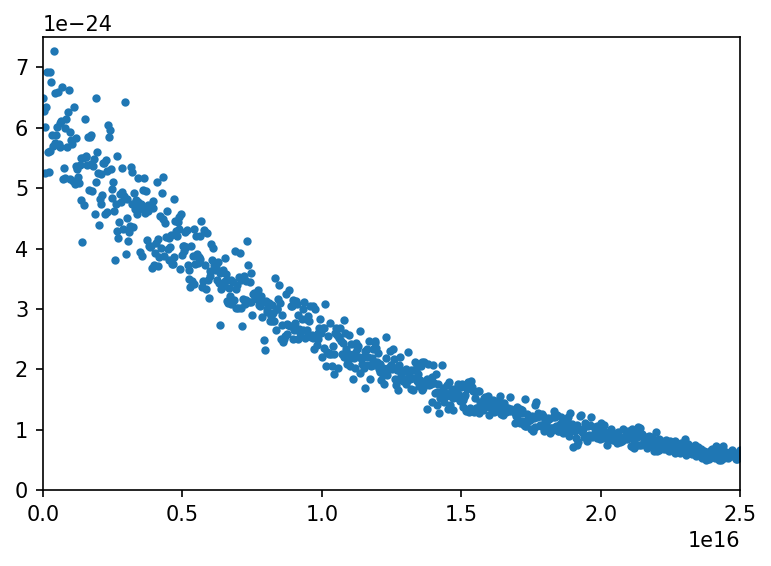

In [6]:
plt.figure(dpi=150)
freqs = np.linspace(0,30e15,1000)
plt.plot(freqs,Efavg,'.')
plt.xlim(0,25e15)
plt.ylim(0,7.5e-24)
#plt.savefig('detector_vacuum_300001.png')
plt.show()

#np.savez("custom_source_vacuum_30000.npz", Efavg_30000 = Efavg)

In [37]:
from PIL import Image

def transPNG(srcImageName, dstImageName):
    img = Image.open(srcImageName)
    img = img.convert("RGBA")
    datas = img.getdata()
    newData = list()
    for item in datas:
        if item[0] > 225 and item[1] > 225 and item[2] > 225:
            newData.append((255, 255, 255, 0))
        else:
            newData.append(item)
    img.putdata(newData)
    img.save(dstImageName, "PNG")
transPNG('detector_vacuum_300001.png','trans_detector_vacuum_300001.png')